## Tarea 1

**Curso: Aprendizaje Automático**

**Estudiantes**

Edwin Mejía Vasconcelo

Jorge Bulgarelli Molina

***Instrucciones***

1- Crear un ambiente de trabajo (.ipynb) basado en PYTHON3 y llamarle Tarea-1.ipynb

2- Contener las librerías: numpy, matplotlib, scikit-learn, pandas, jupyter notebook como mínimo, puede agregar las que considere necesario. 

3- El objetivo de esta Tarea 1 consiste en normalizar y estandarizar el set de datos de daily-min-temperatures.csv de forma manual y automática a partir de scikit-learn o la librería que considere apropiada

4- El entregable consiste en el url de la notebook Tarea-1.ipynb en GITHUB. Subir al TEC Digital un archivo .txt simple con el url a más tardar el dia acordado  en clase e indicado en el TEC Digital, env´ıos pasado el limite de entrega se aplicará la penalizacián discutida en clase.

**Librerías a utilizar**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd

**Cargar archivo**

Carga del archivo daily-min-temperatures.txt utilizando Pandas

In [2]:
df = pd.read_csv(r'/Users/edwinmejia/Documents/DataScience2021-6B/Clase2/daily-min-temperatures.txt')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


**Descripción de datos utilizando multiples métodos**

El método .info() de Pandas permite identificar si hay valores nulos en el conjunto de datos así como los tipos de datos presentes.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [4]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


**Gráfico**

Definición de ejes para grafico.

In [5]:
x = df['Date']
y = df['Temp']

Text(0, 0.5, 'Temperatura Minima')

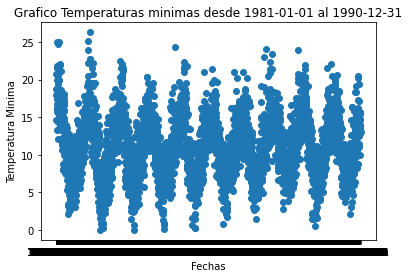

In [6]:
plt.scatter(x, y)
plt.title('Grafico Temperaturas minimas desde 1981-01-01 al 1990-12-31')
plt.xlabel('Fechas')
plt.ylabel('Temperatura Minima')

**Normalización** 

Usualmente significan reescalar los datos entre un rango de 0 y 1. Fórmula para normalización dada por:

$\displaystyle x \ normalizado = \frac{x \ - \ min(x)}{max(x)\ - \ min (x) }$

**Normalizar usando función manual**

La siguiente es la función creada para el cálculo de normalización. 

In [7]:
def normalizacion_manual (datos):

    # Obtener valores mínimos, máximos y almacenarlos en variables
    minimo = min(datos)
    maximo = max(datos)

    datos_normalizados = [ ( x - minimo ) / ( maximo - minimo ) for x in datos ]

    # Devolver lista con valores normalizados   
    return datos_normalizados

Aplicando la función creada (normalizacion_manual) se obtienen las muestras normalizadas.

In [8]:
y_manual_norm = normalizacion_manual (datos = y)
y_manual_norm

[0.7870722433460076,
 0.6806083650190113,
 0.714828897338403,
 0.5551330798479087,
 0.6007604562737643,
 0.6007604562737643,
 0.6007604562737643,
 0.6615969581749048,
 0.8288973384030418,
 0.7604562737642585,
 0.6159695817490494,
 0.5057034220532319,
 0.6349809885931559,
 0.8174904942965779,
 0.9505703422053232,
 0.7870722433460076,
 0.7832699619771863,
 0.9429657794676806,
 0.6730038022813688,
 0.5893536121673003,
 0.6920152091254752,
 0.4600760456273764,
 0.5475285171102662,
 0.6083650190114068,
 0.6273764258555133,
 0.7110266159695817,
 0.7376425855513308,
 0.6539923954372623,
 0.5893536121673003,
 0.5741444866920152,
 0.5855513307984791,
 0.5817490494296578,
 0.714828897338403,
 0.832699619771863,
 0.7566539923954372,
 0.6311787072243347,
 0.6387832699619772,
 0.5551330798479087,
 0.6501901140684411,
 0.9505703422053232,
 0.5703422053231939,
 0.5209125475285171,
 0.5285171102661597,
 0.6958174904942965,
 0.8365019011406843,
 0.8403041825095058,
 0.806083650190114,
 0.69961977186311

Agregar resultados a conjunto de datos original. Esto nos permitirá evaluar los resultados contra las funciones automáticas.

In [9]:
df['Normalizacion_Manual'] = y_manual_norm
df.head()

,Date,Temp,Normalizacion_Manual
0,1981-01-01,20.7,0.787072
1,1981-01-02,17.9,0.680608
2,1981-01-03,18.8,0.714829
3,1981-01-04,14.6,0.555133
4,1981-01-05,15.8,0.600760


**Evaluación de resultados función normalizacion_manual**

In [10]:
df['Normalizacion_Manual'].min()

0.0

In [11]:
df['Normalizacion_Manual'].max()

1.0

La funcion normalizacion_manual cumple que a partir de los datos se obtiene un mínimo de aproximadamente 0 y un máximo de aproximadamente 1.

**Estandarizar usando función manual**

Usualmente significan reescalar para obtener una media de 0 y una desviación estandar de 1. Fórmula para estandarización dada por:

$\displaystyle x \ estandarizado = \frac{x \ - \mu}{\sigma }$

Donde $\mu$ corrresponde a la media de los datos y  $\sigma$ a la desviación estándar de los datos

La siguiente es la función creada para el cálculo de estandarización. 

In [12]:
def estadarizacion_manual(datos):

  # Obtener valores media, desviación estándar y almacenarlos en variables
  media = np.mean(datos)
  desviacion_estandar = np.std(datos)

  # Ciclo estandarizar los datos
  datos_estandarizados = [ (x - media) / desviacion_estandar for x in datos ] 

  # Devolver lista con valores estandarizados   
  return datos_estandarizados

Aplicando la función creada (estadarizacion_manual) se obtienen las muestras estandarizadas.

In [13]:
df['Estadarizacion_Manual'] = estadarizacion_manual(datos = y)
df.head()

,Date,Temp,Normalizacion_Manual,Estadarizacion_Manual
0,1981-01-01,20.7,0.787072,2.338883
1,1981-01-02,17.9,0.680608,1.651139
2,1981-01-03,18.8,0.714829,1.872199
3,1981-01-04,14.6,0.555133,0.840583
4,1981-01-05,15.8,0.600760,1.135330


**Evaluación de resultados función estadarizacion_manual**

In [14]:
df['Estadarizacion_Manual'].std()

1.0001370144556636

In [15]:
df['Estadarizacion_Manual'].mean()

-9.512938382233362e-16

La funcion estadarizacion_manual cumple que a partir de los datos se obtiene una media de aproximadamente 0 y una desviación estandar de aproximadamente 1.

**Normalizacion Automatica con Scikit Learn**

**Agregar columna de sesgo**

Esta columna será necesaria para utilizar lo métodos automáticos de Scikit Learn ya que por las dimensiones de nuestro conjunto (1 columna) de datos no podemos aplicarlo. Para ello utilizaremos librería Pandas.

In [16]:
df['Bias'] = 1
df.head()

,Date,Temp,Normalizacion_Manual,Estadarizacion_Manual,Bias
0,1981-01-01,20.7,0.787072,2.338883,1
1,1981-01-02,17.9,0.680608,1.651139,1
2,1981-01-03,18.8,0.714829,1.872199,1
3,1981-01-04,14.6,0.555133,0.840583,1
4,1981-01-05,15.8,0.600760,1.135330,1


Preparacion de datos para métodos automáticos de la librería Scikit Learn (creación de Matriz 2xn) utilizando Pandas. 

In [17]:
df_temp = df[['Temp', 'Bias']]
df_temp.head()

,Temp,Bias
0,20.7,1
1,17.9,1
2,18.8,1
3,14.6,1
4,15.8,1


In [18]:
df.head()

,Date,Temp,Normalizacion_Manual,Estadarizacion_Manual,Bias
0,1981-01-01,20.7,0.787072,2.338883,1
1,1981-01-02,17.9,0.680608,1.651139,1
2,1981-01-03,18.8,0.714829,1.872199,1
3,1981-01-04,14.6,0.555133,0.840583,1
4,1981-01-05,15.8,0.600760,1.135330,1


Conversión de matriz 2xn a arreglo de datos de Numpy.

In [19]:
datos_para_scikit = np.array( df_temp )
datos_para_scikit

array([[20.7,  1. ],
       [17.9,  1. ],
       [18.8,  1. ],
       ...,
       [13.5,  1. ],
       [15.7,  1. ],
       [13. ,  1. ]])

Aplicar normalización de librería Scikit Learn

In [20]:
scaler = MinMaxScaler()
scaler.fit(datos_para_scikit)
datos_normalizados = scaler.transform(datos_para_scikit)
datos_normalizados

array([[0.78707224, 0.        ],
       [0.68060837, 0.        ],
       [0.7148289 , 0.        ],
       ...,
       [0.51330798, 0.        ],
       [0.59695817, 0.        ],
       [0.49429658, 0.        ]])

Agregar resultado obtenido al conjunto de datos.

In [21]:
df['Normalizacion_Automatica'] = datos_normalizados[:,0]
df.head()

,Date,Temp,Normalizacion_Manual,Estadarizacion_Manual,Bias,Normalizacion_Automatica
0,1981-01-01,20.7,0.787072,2.338883,1,0.787072
1,1981-01-02,17.9,0.680608,1.651139,1,0.680608
2,1981-01-03,18.8,0.714829,1.872199,1,0.714829
3,1981-01-04,14.6,0.555133,0.840583,1,0.555133
4,1981-01-05,15.8,0.600760,1.135330,1,0.600760


**Estandarización Automática con Scikit Learn**

Aplicar estandarización de librería Scikit Learn

In [22]:
scaler = StandardScaler()
scaler.fit(datos_para_scikit)
datos_estandarizados = scaler.transform(datos_para_scikit)
datos_estandarizados

array([[2.33888328, 0.        ],
       [1.65113873, 0.        ],
       [1.87219948, 0.        ],
       ...,
       [0.5703973 , 0.        ],
       [1.11076801, 0.        ],
       [0.44758577, 0.        ]])

Agregar resultado obtenido al conjunto de datos.

In [23]:
df['Estandarizacion_Automatica'] = datos_estandarizados[:,0]
df.head()

,Date,Temp,Normalizacion_Manual,Estadarizacion_Manual,Bias,Normalizacion_Automatica,Estandarizacion_Automatica
0,1981-01-01,20.7,0.787072,2.338883,1,0.787072,2.338883
1,1981-01-02,17.9,0.680608,1.651139,1,0.680608,1.651139
2,1981-01-03,18.8,0.714829,1.872199,1,0.714829,1.872199
3,1981-01-04,14.6,0.555133,0.840583,1,0.555133,0.840583
4,1981-01-05,15.8,0.600760,1.135330,1,0.600760,1.135330


**Comparación de Métodos**

Comparacion de los resultados obtenidos de forma manual contra los resultados obtenidos de forma automática.

In [24]:
lista1 = df['Normalizacion_Manual'] == df['Normalizacion_Automatica']
set(lista1)

{True}

In [25]:
lista2 = df['Estadarizacion_Manual'].round(decimals = 6) == \
df['Estandarizacion_Automatica'].round(decimals = 6) 

set(lista2)

{True}

Por lo tanto queda demostrado que nuestros métodos manuales para normalización y estandarización producen los mismos resultados que las funciones de librería de Scikit Learn.